In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
df = pd.read_csv("Salary_dataset.csv")

In [127]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [129]:
df.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

In [130]:
df["Salary"].isnull().sum()
df["YearsExperience"].isnull().sum()
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [131]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [132]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["YearsExperience"]])
y_scaled = scaler.fit_transform(df[["Salary"]])
df["YearsExperience"] = X_scaled
df["Salary"] = y_scaled

In [134]:
df.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


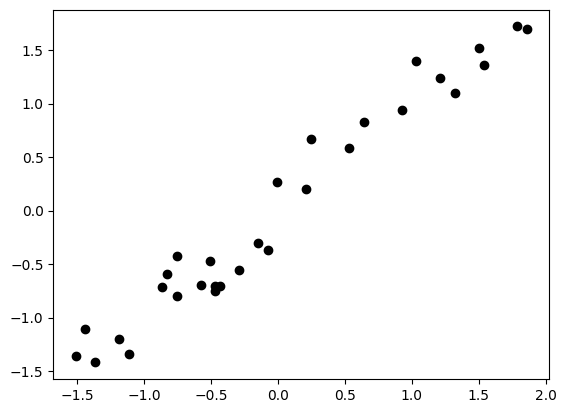

In [135]:

plt.scatter(df["YearsExperience"],df["Salary"], color="black")
plt.show()

In [136]:
X = df["YearsExperience"]
y = df["Salary"]
X.shape,y.shape
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression()

In [138]:
y_pred = reg.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.06858932896507032
R-squared Score: 0.90


In [139]:
reg_predict = reg.predict(X.values.reshape(-1, 1))

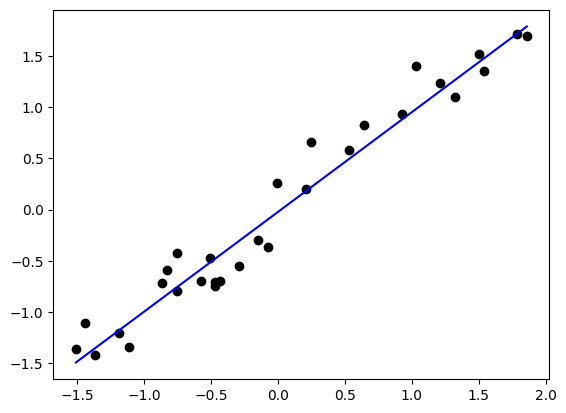

In [140]:

plt.scatter(df["YearsExperience"],df["Salary"], color="black")
plt.plot(df["YearsExperience"], reg_predict, color="blue")
plt.show()

In [146]:

user_input = float(input("Enter years of experience: "))


scaled_input = scaler.fit_transform([[user_input]])


predicted_salary_scaled = reg.predict(scaled_input)

predicted_salary = scaler.inverse_transform(predicted_salary_scaled)

print(f"Predicted Salary: {predicted_salary[0][0]}")

Predicted Salary: 0.9773854413202174
